<a href="https://colab.research.google.com/github/mariajuliapessoa/Dataset-UFC-campe-es/blob/main/mjpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ufc_champs_final.csv')

In [ ]:
dataset = dataset.drop(["B_draw", "B_win_by_Decision_Split", "R_draw", "R_win_by_Decision_Majority", "R_win_by_TKO_Doctor_Stoppage", "R_Welterweight_rank", "R_Flyweight_rank"], axis=1)


In [ ]:
pd.options.display.max_columns = None

In [ ]:
pd.options.display.max_rows = None

In [ ]:
dataset = dataset.fillna(0.0)


In [ ]:
dataset.head(10)

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Demetrious Johnson,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",USA,Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Red,S-DEC,0.0,5.0,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Demetrious Johnson,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,5.0,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Demetrious Johnson,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",USA,Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,3.0,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Demetrious Johnson,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,-7.380952,0.73

# **Probabilidade Simples**


Qual é a probabilidade de uma luta ter ocorrido no Canadá?

In [ ]:
total_lutas = len(dataset)
lutas_canada = (dataset['country'] == ' Canada').sum()

prob = lutas_canada/total_lutas
print("A probabilidade de uma luta ter ocorrido no Canadá é de: ", round(prob*100, 2), "%")



A probabilidade de uma luta ter ocorrido no Canadá é de:  7.91 %


Na probabilidade simples apenas calculamos a chance de uma luta, dentre todos os países do dataset, ocorrer no Canadá.

# Probabilidade da União

Qual é a probabilidade da luta ter terminado com Armbar ou de ter durado mais de 2 minutos?

In [ ]:
armbar_lutas = dataset[dataset['finish_details']=='Armbar']
probArmbar = len(armbar_lutas)/len(dataset)

lutasMais2 = dataset[dataset['finish_round']>=2.0]
prob_maior2 = len(lutasMais2)/len(dataset)

inters = len(dataset[(dataset['finish_details']=='Armbar') & (dataset['finish_round']>=2.0)])/len(dataset)
prob_uniao = probArmbar + prob_maior2 - inters

print("A probabilidade da luta ter terminado com Armbar ou de ter durado mais de 2 minutos é de:", round(prob_uniao*100, 2), "%")


A probabilidade da luta ter terminado com Armbar ou de ter durado mais de 2 minutos é de: 71.08 %


No exemplo acima temos a probabilidade sendo calculada pela junção dos dois eventos, terminar a luta com Armbar e duração da luta maior que 2 minutos, subtraída pela interseção, como na formula da probabilidade da união, ensinada em sala.

# Probabilidade da Intersecção

Qual a probabilidade de ter lutado no Canadá e ser Flyweight?

In [ ]:
flyweight = len(dataset[(dataset['country'] == ' Canada') & (dataset['weight_class'] == 'Flyweight')])

lutas_canada = len(dataset[dataset['country'] == ' Canada'])

prob = flyweight/lutas_canada
print("A probabilidade de lutar no Canadá e ser da categoria de peso Flyweight é de", round(prob*100, 2), "%")


A probabilidade de lutar no Canadá e ser da categoria de peso Flyweight é de 9.84 %


Nesse caso utilizamos os dados para pegar os elementos em comum de ambos eventos, ser Flyweight e ter lutado no Canadá.

# Probabilidade do Complemento

Qual é a probabilidade de ter lutado no Canadá e não ser Flyweight?



In [ ]:
lutas_canada = len(dataset[dataset['country'] == ' Canada'])

dif_flyweight = len(dataset[(dataset['country'] == ' Canada') & (dataset['weight_class'] != 'Flyweight')])

prob = dif_flyweight/lutas_canada

print("A probabilidade de ter lutado no Canadá e não ser da categoria de peso Flyweight é de", round(prob*100, 2), "%")


A probabilidade de ter lutado no Canadá e não ser da categoria de peso Flyweight é de 90.16 %


No exemplo acima utilizamos o complemneto do conjunto, ou seja, os elementos fora do evento, e calculamos sua porcentagem.

# Probabilidade da Diferença

Qual a probabilidade do lutador ter lutado nos EUA, mas não em Las Vegas?

In [ ]:
lutas_eua = len(dataset[dataset['country'] == 'USA'])

lutas_vegas = len(dataset[(dataset['location'] == 'Las Vegas, Nevada, USA')])

vegas_exclude = len(dataset[(dataset['country'] == 'USA') & (dataset['location'] != 'Las Vegas, Nevada, USA')])

prob = vegas_exclude/lutas_eua

print("A probabilidade de um lutador ter lutado nos EUA, mas não em Las Vegas, é de: ", round(prob*100, 2), "%")


A probabilidade de um lutador ter lutado nos EUA, mas não em Las Vegas, é de:  30.16 %


Na probabilidade da diferença excluímos um evento específico do espaço amostral e pegamos sua porcentagem.


# Probabilidade Condicional

Qual a probabilidade de uma luta ter durado mais de 3 rounds, visto que ambos os lutadores são Lightweight?


In [ ]:
lutas_lightweight = dataset[(dataset["weightclass"] == "Lightweight")]

prob = len(lutas_lightweight[lutas_lightweight["no_of_rounds"] > 3])/len(lutas_lightweight)

print("A probabilidade de uma luta ter durado mais de 3 rounds, dado que ambos os lutadores são Lightweight, é de: ", round(prob*100, 2), "%")


A probabilidade de uma luta ter durado mais de 3 rounds, dado que ambos os lutadores são Lightweight, é de:  39.67 %


O código filtra o dataset, mostrando somente as lutas em que ambos os lutadores são da categoria Lightweight, armazenando os resultados na variável "lutas_lightweight". Usando a fórmula P(A | B) = P(A e B) / P(B) conseguimos esse resultado.

# Teorema de Bayes

qual é a probabilidade de um lutador vencer uma luta, dado que ele está na categoria de peso "Peso Médio"?

Nesse exemplo utilizamos o Teorema de Bayes permitindo calcular a probabilidade do evento ser lightweight enquanto compete no brasil, evento que já havia ocorrido.

# Variáveis Aleatórias

In [ ]:
dataset['Lutadores'] = dataset['R_fighter'] = dataset['B_fighter']

Foi criada uma variável para juntar todos os lutadores do dataset.

In [ ]:
dataset.head(10)

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Lutadores
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",USA,Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Red,S-DEC,0.0,5.0,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0,Henry Cejudo
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,5.0,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0,Ray Borg
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",USA,Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,3.0,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0,Wilson Reis
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,

In [ ]:
dataset['Lutadores'].value_counts(sort=False).sort_index()

Abel Trujillo             1
Al Iaquinta               1
Alan Belcher              1
Alex Morono               1
Alex Perez                1
Alexa Grasso              1
Alexander Gustafsson      5
Alexander Volkanovski     7
Alexander Volkov          1
Alexander Yakovlev        1
Alexandre Pantoja         1
Alexis Davis              1
Ali Bagautinov            1
Alistair Overeem          2
Aljamain Sterling         8
Amanda Nunes             10
Anderson Silva            9
Andre Ewell               1
Andre Fili                1
Andrei Arlovski           1
Andy Ogle                 1
Angela Hill               2
Anna Elmose               1
Anthony Hamilton          1
Anthony Johnson           2
Anthony Njokuani          1
Anthony Pettis            9
Anthony Smith             1
Antonio Silva             2
Augusto Mendes            2
Ben Askren                1
Benson Henderson          5
Bethe Correia             2
Bobby Voelker             1
Bojan Mihajlovic          1
Bradley Scott       

No código acima consideramos a frequência de cada lutador, ordenando-os em ordem alfabética com a função "sort_index".

# Função Probabilidade

In [ ]:
fp = dataset['Lutadores'].value_counts(sort=False).sort_index()/dataset['Lutadores'].count()
print(fp)

Abel Trujillo            0.001297
Al Iaquinta              0.001297
Alan Belcher             0.001297
Alex Morono              0.001297
Alex Perez               0.001297
Alexa Grasso             0.001297
Alexander Gustafsson     0.006485
Alexander Volkanovski    0.009079
Alexander Volkov         0.001297
Alexander Yakovlev       0.001297
Alexandre Pantoja        0.001297
Alexis Davis             0.001297
Ali Bagautinov           0.001297
Alistair Overeem         0.002594
Aljamain Sterling        0.010376
Amanda Nunes             0.012970
Anderson Silva           0.011673
Andre Ewell              0.001297
Andre Fili               0.001297
Andrei Arlovski          0.001297
Andy Ogle                0.001297
Angela Hill              0.002594
Anna Elmose              0.001297
Anthony Hamilton         0.001297
Anthony Johnson          0.002594
Anthony Njokuani         0.001297
Anthony Pettis           0.011673
Anthony Smith            0.001297
Antonio Silva            0.002594
Augusto Mendes

Com essa função é possível calcular a frequência relativa de cada valor em "Lutadores".

# Função Cumulativa (Função Repartição)

In [ ]:
fp.cumsum()

Abel Trujillo            0.001297
Al Iaquinta              0.002594
Alan Belcher             0.003891
Alex Morono              0.005188
Alex Perez               0.006485
Alexa Grasso             0.007782
Alexander Gustafsson     0.014267
Alexander Volkanovski    0.023346
Alexander Volkov         0.024643
Alexander Yakovlev       0.025940
Alexandre Pantoja        0.027237
Alexis Davis             0.028534
Ali Bagautinov           0.029831
Alistair Overeem         0.032425
Aljamain Sterling        0.042802
Amanda Nunes             0.055772
Anderson Silva           0.067445
Andre Ewell              0.068742
Andre Fili               0.070039
Andrei Arlovski          0.071336
Andy Ogle                0.072633
Angela Hill              0.075227
Anna Elmose              0.076524
Anthony Hamilton         0.077821
Anthony Johnson          0.080415
Anthony Njokuani         0.081712
Anthony Pettis           0.093385
Anthony Smith            0.094682
Antonio Silva            0.097276
Augusto Mendes

Calcula a soma cumulativa das frequências relativas.

# Gráfico Simples

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Gráfico')

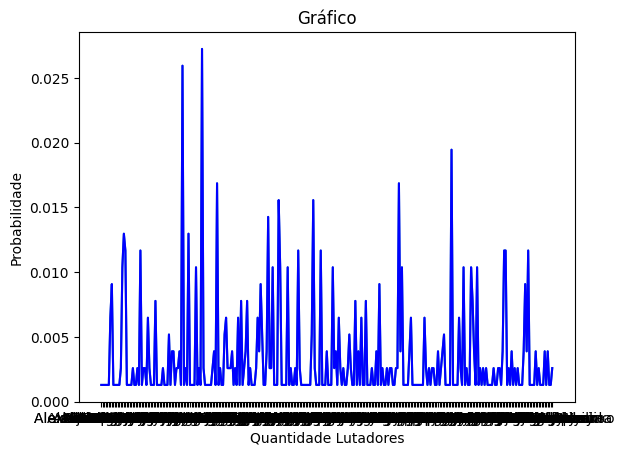

In [ ]:
plt.plot(fp)
plt.plot(fp, 'b-')
plt.xlabel('Quantidade Lutadores')
plt.ylabel('Probabilidade')
plt.title('Gráfico')

Text(0.5, 1.0, 'Probabilidade Acumulada')

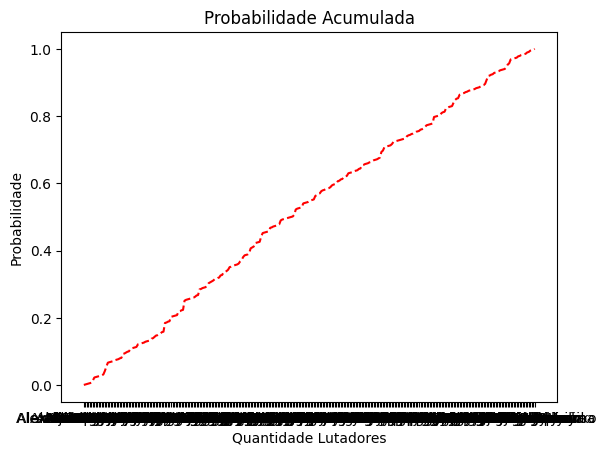

In [ ]:
grafico = fp.cumsum()
plt.plot(grafico, 'r--')
plt.xlabel('Quantidade Lutadores')
plt.ylabel('Probabilidade')
plt.title('Probabilidade Acumulada')

# Covariância

In [ ]:
dataset[['win_dif', 'loss_dif']].cov()

,win_dif,loss_dif
win_dif,27.385972,-6.345364
loss_dif,-6.345364,7.704998


## **Correlação**

In [ ]:
dataset[['win_dif', 'loss_dif']].corr()

,win_dif,loss_dif
win_dif,1.000000,-0.436824
loss_dif,-0.436824,1.000000


# **Tratamento de Dados**

# Informações Básicas do Dataset

In [ ]:
dataset.head(10)

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Lutadores
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",USA,Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Red,S-DEC,0.0,5.0,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0,Henry Cejudo
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,5.0,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0,Ray Borg
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",USA,Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Red,SUB,Armbar,3.0,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0,Wilson Reis
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Columns: 115 entries, Unnamed: 0 to Lutadores
dtypes: bool(1), float64(56), int64(42), object(16)
memory usage: 687.5+ KB


In [ ]:
dataset.drop(['Lutadores','country', 'finish_round','finish_details', 'better_rank'], axis=1, inplace=True)

In [ ]:
dataset.head()

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,S-DEC,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,-7.380952,0.738095,-1.047619,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U-DEC,5:00,15

In [ ]:
dataset.describe()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.00000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,202.872892,-208.211414,140.548638,80.118852,220.064720,3.989624,0.293126,1.939040,30.333626,0.438514,0.455157,1.371482,0.323758,3.745785,2.143969,19.867704,1.171206,0.042802,2.011673,2.361868,1.115435,0.040208,6.023346,176.567886,181.203398,163.193256,0.348898,2.900130,35.214092,0.466094,0.482357,1.635823,0.365375,4.753567,2.239948,24.745785,2.345006,0.504540,2.627756,2.757458,1.326848,7.381323,176.235149,181.453671,164.184176,30.483787,30.29572,0.084306,-0.961089,-1.007782,-1.357977,0.108949,-4.878080,-1.173800,-0.396887,-0.211414,0.332737,-0.250272,0.079118,-4.880466,-0.027199,-0.264341,0.092088,1.0,2.942931,2.140078,0.005188,0.0,0.130999,0.313878,0.175097,0.226978,0.271077,0.280156,0.198444,0.239948,2.010376,0.025940,0.0,0.217899,0.428016,0.210117,0.254215,0.465629,0.307393,0.387808,0.345006,0.300908,0.237354,0.808042,714.289235,261.254215,499.661479,742.173800,1133.913100,326.452659,564.151751
std,128.014212,329.474553,279.105722,79.852095,185.733916,0.999946,0.628081,2.061438,22.803340,0.153020,0.583690,1.322550,0.222300,2.843122,2.308375,17.510238,2.472551,0.202541,2.099751,2.821080,1.820777,0.196573,4.905282,9.706439,12.182878,35.937576,0.707241,3.279474,23.438804,0.121239,0.520735,1.277291,0.204495,3.109929,2.196399,17.259072,2.962587,0.725003,2.280398,2.660

<Axes: >

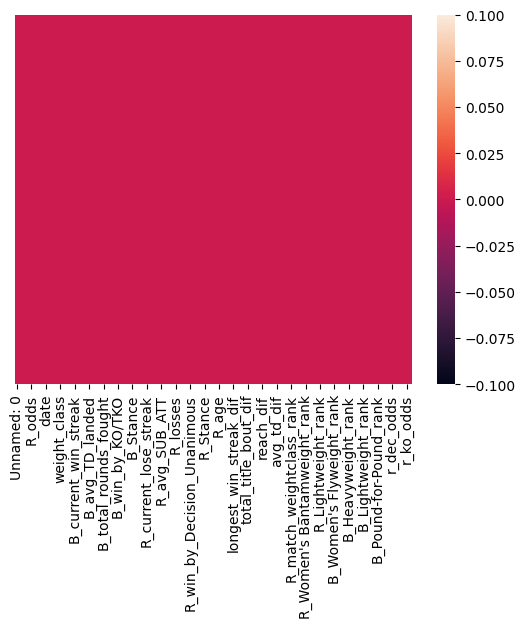

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels=False)

<Axes: >

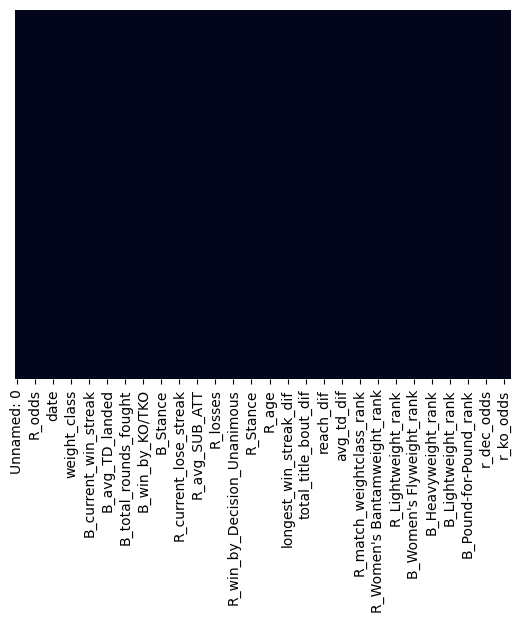

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

<Axes: >

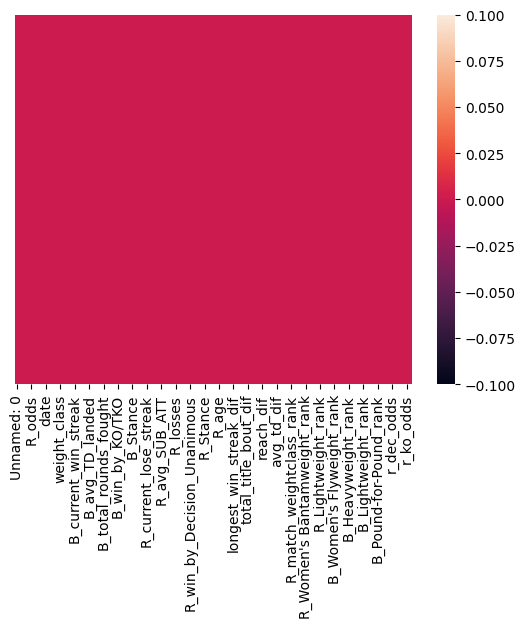

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False)

In [ ]:
sum(dataset.no_of_rounds.isna())

0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Columns: 110 entries, Unnamed: 0 to b_ko_odds
dtypes: bool(1), float64(55), int64(42), object(12)
memory usage: 657.4+ KB


In [ ]:
dataset.head()

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,S-DEC,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,-7.380952,0.738095,-1.047619,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U-DEC,5:00,15

In [ ]:
rounds = pd.get_dummies(dataset['no_of_rounds'],drop_first=True)

In [ ]:
rounds

,4,5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [ ]:
v_vencedor = pd.get_dummies(dataset['R_wins'],drop_first=True)
v_vencedor

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.head()

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",Blue,True,Flyweight,MALE,5,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,15,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,S-DEC,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,14,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",Red,True,Flyweight,MALE,5,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,13,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,5,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,12,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,-7.380952,0.738095,-1.047619,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U-DEC,5:00,15

In [ ]:
dataset.drop(['no_of_rounds', 'R_wins'], axis=1, inplace=True)

In [ ]:
dataset.head()

,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,Winner,title_bout,weight_class,gender,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Henry Cejudo,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",Blue,True,Flyweight,MALE,0,2,46.375000,0.442500,0.125000,2.000000,0.538750,4,2,21,1,0,4,1,0,0,6,Orthodox,162.56,162.56,135,0,13,64.235294,0.548824,0.705882,4.294118,0.472941,13,2,64,13,1,7,2,5,Orthodox,160.02,167.64,125,31,31,0,-11,-9,-9,0,-43,-12,-1,-5,2.54,-5.08,0,-17.860294,-0.580882,-2.294118,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,S-DEC,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Ray Borg,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,0,2,19.428571,0.522857,1.571429,2.714286,0.581429,3,2,19,0,0,3,0,2,0,5,Orthodox,162.56,160.02,135,0,12,64.250000,0.533750,0.625000,4.062500,0.440000,12,2,59,12,1,7,2,4,Orthodox,160.02,167.64,125,31,24,0,-10,-9,-9,0,-40,-12,-2,-2,2.54,-7.62,7,-44.821429,0.946429,-1.348214,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Wilson Reis,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",Red,True,Flyweight,MALE,0,3,25.625000,0.387500,0.625000,4.375000,0.483750,3,2,20,0,0,4,0,2,0,6,Southpaw,162.56,165.10,125,0,11,61.333333,0.530667,0.600000,4.266667,0.436000,11,2,56,11,1,7,2,3,Orthodox,160.02,167.64,125,30,32,0,-8,-8,-7,0,-36,-11,-2,-1,2.54,-2.54,-2,-35.708333,0.025000,0.108333,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,SUB,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Tim Elliott,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",Red,True,Flyweight,MALE,3,0,56.333333,0.498333,1.166667,3.166667,0.583333,2,4,16,0,0,2,0,0,0,2,Southpaw,170.18,167.64,135,0,10,63.714286,0.534286,0.428571,4.214286,0.416429,10,2,51,10,1,6,2,3,Orthodox,160.02,167.64,125,30,29,-3,-10,-8,-10,-2,-35,-10,-2,-3,10.16,0.00,1,-7.380952,0.738095,-1.047619,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U-DEC,5:00,1500.0,150.0,1400.0,185.0,2000.0,259.0,160

In [ ]:
dataset.describe()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.00000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.0,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,202.872892,-208.211414,140.548638,80.118852,220.064720,0.293126,1.939040,30.333626,0.438514,0.455157,1.371482,0.323758,3.745785,2.143969,19.867704,1.171206,0.042802,2.011673,2.361868,1.115435,0.040208,6.023346,176.567886,181.203398,163.193256,0.348898,2.900130,35.214092,0.466094,0.482357,1.635823,0.365375,4.753567,2.239948,24.745785,2.345006,0.504540,2.627756,2.757458,1.326848,176.235149,181.453671,164.184176,30.483787,30.29572,0.084306,-0.961089,-1.007782,-1.357977,0.108949,-4.878080,-1.173800,-0.396887,-0.211414,0.332737,-0.250272,0.079118,-4.880466,-0.027199,-0.264341,0.092088,1.0,2.942931,2.140078,0.005188,0.0,0.130999,0.313878,0.175097,0.226978,0.271077,0.280156,0.198444,0.239948,2.010376,0.025940,0.0,0.217899,0.428016,0.210117,0.254215,0.465629,0.307393,0.387808,0.345006,0.300908,0.237354,0.808042,714.289235,261.254215,499.661479,742.173800,1133.913100,326.452659,564.151751
std,128.014212,329.474553,279.105722,79.852095,185.733916,0.628081,2.061438,22.803340,0.153020,0.583690,1.322550,0.222300,2.843122,2.308375,17.510238,2.472551,0.202541,2.099751,2.821080,1.820777,0.196573,4.905282,9.706439,12.182878,35.937576,0.707241,3.279474,23.438804,0.121239,0.520735,1.277291,0.204495,3.109929,2.196399,17.259072,2.962587,0.725003,2.280398,2.660350,1.826086,9.909662,12.837106,35.936377,4.047213,4.42786,0.821402,3

# Box Plot

No boxplot temos a distribuição quantitativa mostrado de uma forma que facilita a comparação entre as variáveis.
Utilizaremos para o gráfico as colunas de jogadores azuis que perderam e sua relação com todos os rounds lutados dos jogadores azuis. Através dele podemos observar a dispersão e a assimetria dos dados, assim como identificar valores extremos, dando ênfase aos dados discrepantes no gráfico.

In [ ]:
import plotly.express as px
fig = px.box(dataset, x='B_losses', y='R_total_rounds_fought')
fig.show()

Como pode-se observar acima, quanto mais lutas houveram, a chance de perder também aumentava. Referência: https://statplace.com.br/blog/como-interpretar-um-boxplot/

# Histograma


  O histograma é um gráfico que nos mostra quantas vezes determinados valores ocorreram, com uma distribuição de frequência. Com ele é possível analisar o gráfico de rounds totais do lutador azul.

In [ ]:
import plotly.express as px
fig2 = px.histogram(dataset, x = 'B_total_rounds_fought', marginal= 'rug')
fig2.show()

Como observado, é muito mais tendencioso que os lutadores lutem de 0 a 4 rounds do que 10 a 14, por exemplo. Quanto menor o número total de rounds, maior será a quantidade de competidores. Referência: https://support.minitab.com/pt-br/minitab/21/help-and-how-to/graphs/histogram/interpret-the-results/key-results/#step-1-assess-the-key-characteristics

# Scatter Plot

É utilizado para visualizar a relação entre as variáveis e identificar padrões, tendências ou correlações. Utilizando as perdas dos lutadores azuis e vermelhos e seus respectivos números totais de rounds, foram gerados os seguintes gráficos:

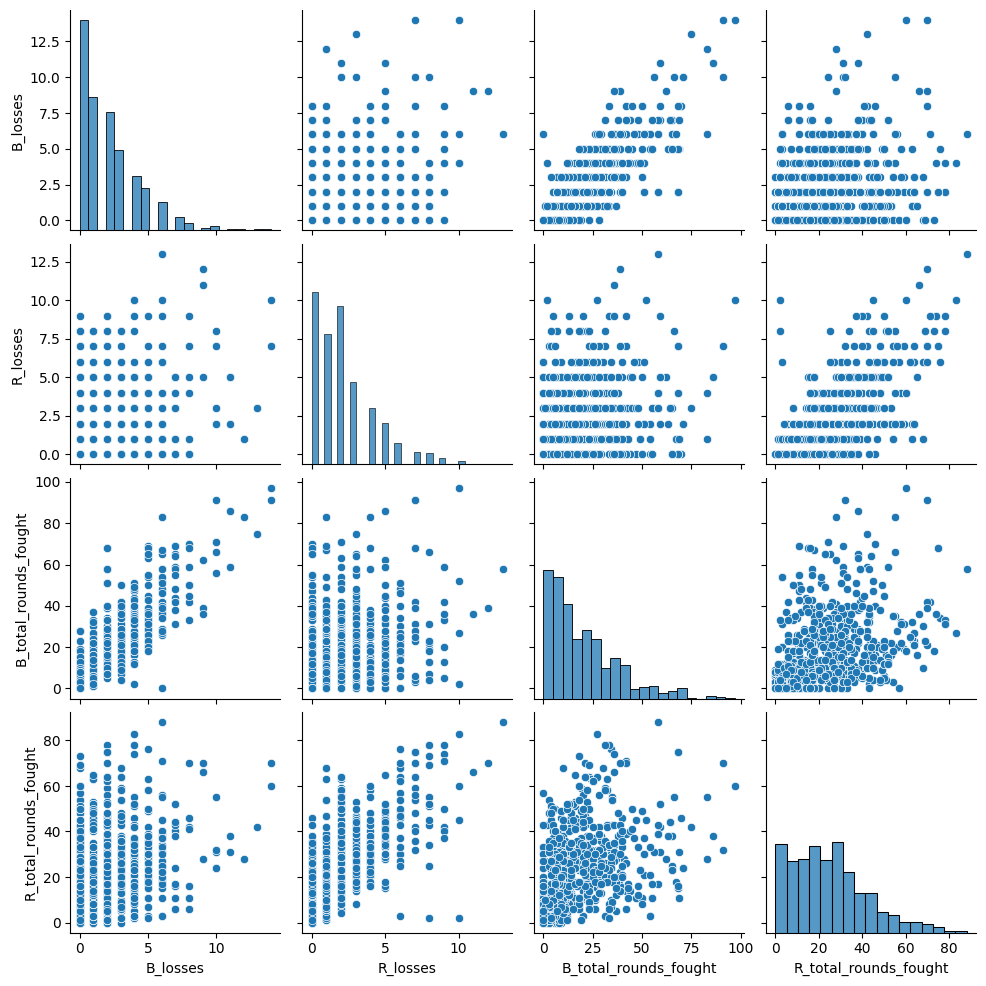

In [ ]:
import seaborn as sns
col = ['B_losses', 'R_losses', 'B_total_rounds_fought','R_total_rounds_fought']
sns.pairplot(dataset[col])

Interpretando-os, podemos observar que quanto maior o número de rounds concluídos dos lutadores vermelhos, menores são as derrotas dos jogadores azuis. Também pode-se analisar que houveram mais rounds de lutadores vermelhos do que de lutadores azuis. Referência: https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/

# Heatmap


O gráfico a seguir é um modo de visualização de dados que associa cores à intensidade da variável mostrada. Podemos observar seu comportamento ao olharmos o espectro de cores ao lado.

<Axes: >

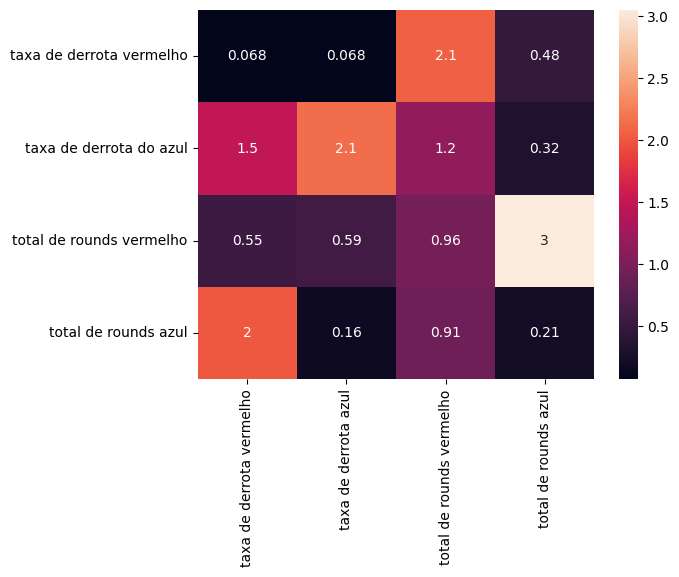

In [ ]:
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['taxa de derrota vermelho', 'taxa de derrota do azul', 'total de rounds vermelho', 'total de rounds azul']
Cols = ['taxa de derrota vermelho', 'taxa de derrota azul', 'total de rounds vermelho','total de rounds azul']
df = DataFrame(abs(np.random.randn(4, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)


Referência: https://chartio.com/learn/charts/heatmap-complete-guide/#:~:text=A%20heatmap%20(aka%20heat%20map,in%20the%20corresponding%20cell%20range.

# Normalização de dados


É perceptível que ao normalizar os dados, obtêm-se um resultado mais limpo e enxuto, tornando mais fácil de administrar, ocasionando maior eficiência e eliminando anomalias. Foram normalizadas as colunas de diferença de altura e de envergadura dos lutadores.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ufc_champs_final.csv')

normalpadrao = ['height_dif', 'reach_dif']

scaler = StandardScaler()

dataset[normalpadrao] = scaler.fit_transform(dataset[normalpadrao])

normalpadrao = pd.DataFrame(dataset[normalpadrao])
print(normalpadrao.head())

   height_dif  reach_dif
0    0.348651  -0.517705
1    0.348651  -0.789971
2    0.348651  -0.245439
3    1.552275   0.026827
4    0.348651  -0.517705


In [ ]:
normalpadrao.describe()

,height_dif,reach_dif
count,7.710000e+02,7.710000e+02
mean,9.215859e-18,1.843172e-17
std,1.000649e+00,1.000649e+00
min,-3.262224e+00,-3.240364e+00
25%,-4.537661e-01,-5.177048e-01
50%,-5.255777e-02,2.682702e-02
75%,7.498588e-01,5.713588e-01
max,2.755900e+00,3.021752e+00


# Distribuições Amostrais

No exemplo a seguir utilizaremos a coluna de derrotas dos jogadores azuis para observarmos os dados de distruição amostral. Consideremos que a distribuição amostral é uma teoria que representa a variação dos valores de uma determinada estatística quando amostras diferentes são selecionadas da mesma população, dessa forma, serão utilizados 5 valores para análise.

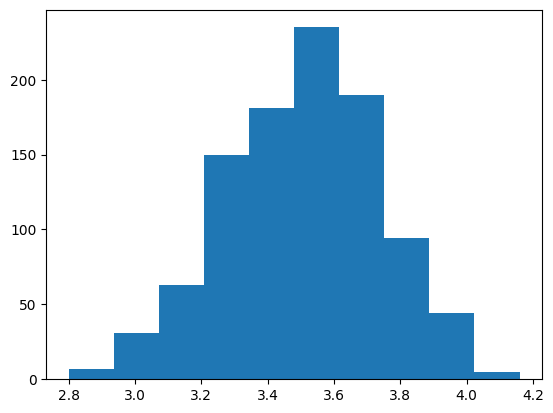

In [ ]:
means=[mean(randint(1,7,50)) for _ in range(1000)]

plt.hist(means)
plt.show()

Valor da população é 1


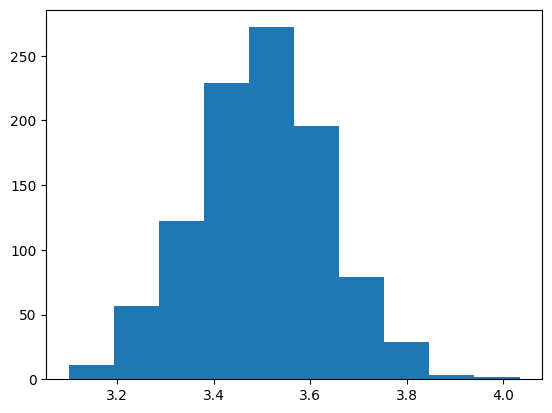

In [ ]:
means=[mean(randint(1,7,150)) for _ in range(1000)]

plt.hist(means)
plt.show()

Valor da população é 150

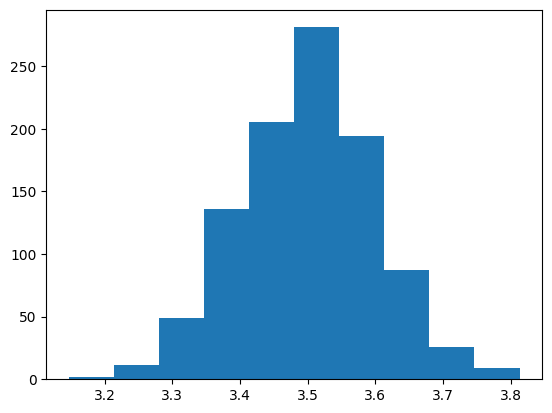

In [ ]:
means=[mean(randint(1,7,300)) for _ in range(1000)]

plt.hist(means)
plt.show()

Valor da população é 300


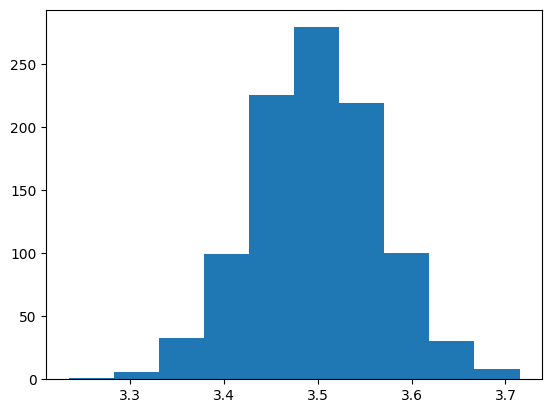

In [ ]:
means=[mean(randint(1,7,600)) for _ in range(1000)]

plt.hist(means)
plt.show()

Valor da população é 600

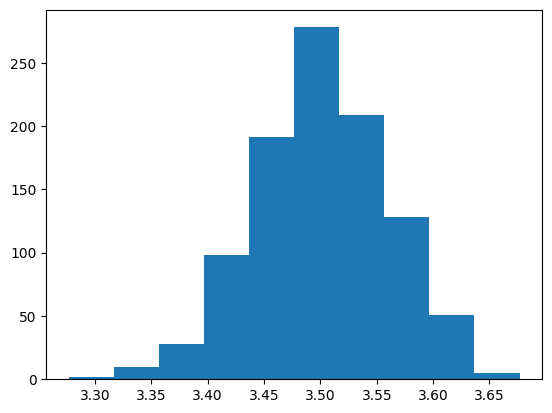

In [ ]:
means=[mean(randint(1,7,900)) for _ in range(1000)]

plt.hist(means)
plt.show()

Valor da população é 900


Em conclusão, como observado nos gráficos acima, percebe-se que quanto maior o valor da população mais ele se aproxima de uma distribuição normal, já que a distribuição amostral está relacionada ao limite central.

Referência: https://www.inf.ufsc.br/~andre.zibetti/probabilidade/distribuicao_amostral.html

# Intervalos de Confiança


Seguem os cálculos de intervalo de confiança de 90% e 95% calculando o número total de rounds dos lutadores vermelhos e suas vitórias. Serão calculadas, respectivamente, média, desvio padrão, intervalo de confiança e o tamanho das amostras obtidas.

In [ ]:
from scipy import stats

total = dataset["R_total_rounds_fought"]
vitoria = dataset["R_wins"]

m = np.mean(total)
dvp = np.std(total)

m2 = np.mean(vitoria)
dvp2 = np.std(vitoria)

conf = 0.90

amostra = len(total)

inter_total = stats.t.interval(conf, amostra-1, loc=m, scale=dvp/np.sqrt(amostra))
inter_vit = stats.t.interval(conf, amostra-1, loc=m2, scale=dvp2/np.sqrt(amostra))

print("O intervalo para o total de rounds do vermelho é:", inter_total)
print("O intervalo para as vitórias do vermelho é:", inter_vit)


O intervalo para o total de rounds do vermelho é: (23.722825083109196, 25.76874430729288)
O intervalo para as vitórias do vermelho é: (7.095246982081195, 7.667398932315692)


In [ ]:
from scipy import stats

total = dataset["R_total_rounds_fought"]
vitoria = dataset["R_wins"]

m = np.mean(total)
dvp = np.std(total)

m2 = np.mean(vitoria)
dvp2 = np.std(vitoria)

conf = 0.95

amostra = len(total)

inter_total = stats.t.interval(conf, amostra-1, loc=m, scale=dvp/np.sqrt(amostra))
inter_vit = stats.t.interval(conf, amostra-1, loc=m2, scale=dvp2/np.sqrt(amostra))

print("O intervalo para o total de rounds do vermelho é:", inter_total)
print("O intervalo para as vitórias do vermelho é:", inter_vit)


O intervalo para o total de rounds do vermelho é: (23.52640294368386, 25.965166446718218)
O intervalo para as vitórias do vermelho é: (7.040316509356262, 7.722329405040626)
